<a href="https://colab.research.google.com/github/spycoder01/100-days-ml/blob/main/outliers_detection_using_percentile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
df = pd.read_csv('/content/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [20]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<Axes: ylabel='Height'>

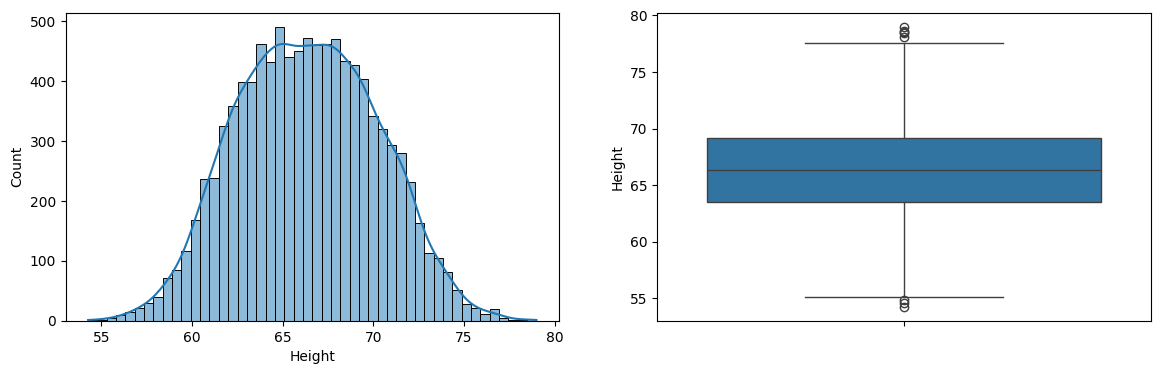

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(df['Height'],kde=True)

plt.subplot(1,2,2)
sns.boxplot(df['Height'])

In [22]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

In [23]:
print('upper_limit',upper_limit)
print('lower_limit',lower_limit)

upper_limit 74.7857900583366
lower_limit 58.13441158671655


Trimming

In [24]:
trim_df = df[(df['Height'] > upper_limit) | (df['Height'] < lower_limit)]
trim_df

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [25]:
new_df = df[(df['Height'] < upper_limit) & (df['Height'] > lower_limit)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: ylabel='Height'>

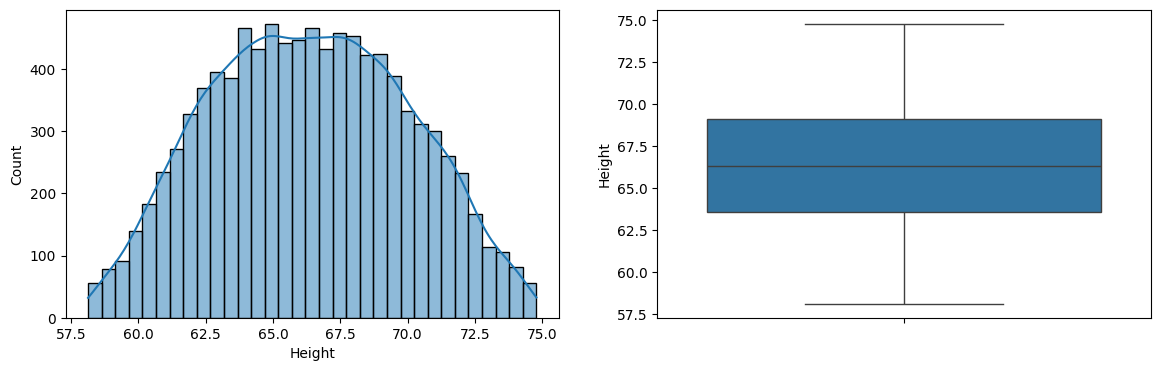

In [26]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(new_df['Height'],kde=True)

plt.subplot(1,2,2)
sns.boxplot(new_df['Height'])

Capping --> Winsorization

In [46]:
df_cap = df.copy()
df_cap['Height'] = np.where(
    df_cap['Height'] > upper_limit,
    upper_limit,
    np.where(
        df_cap['Height'] < lower_limit,
        lower_limit,
        df_cap['Height']
    )
)

In [47]:
df_cap.shape

(10000, 3)

In [58]:
df_cap.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.366281,161.440357
std,3.795717,32.108439
min,58.134412,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,74.785790,269.989699


Now comparing with the plot

<Axes: xlabel='Height', ylabel='Count'>

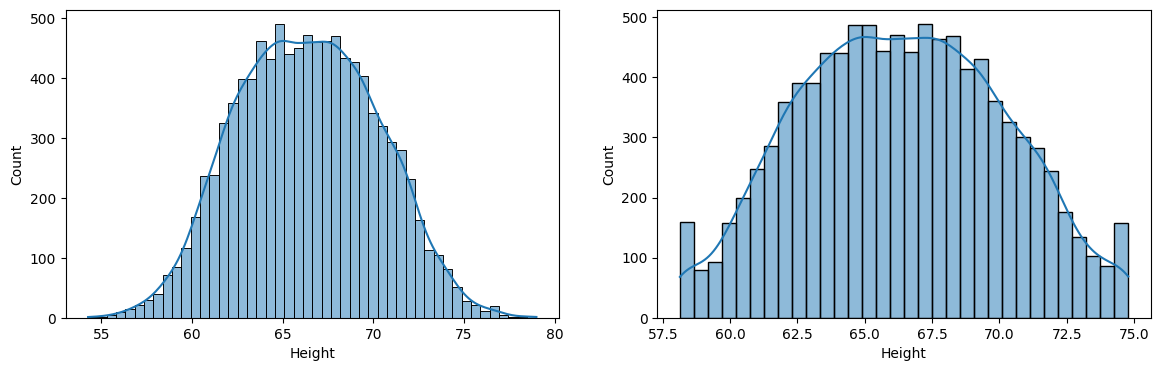

In [69]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(df['Height'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df_cap['Height'],kde=True)

<Axes: ylabel='Height'>

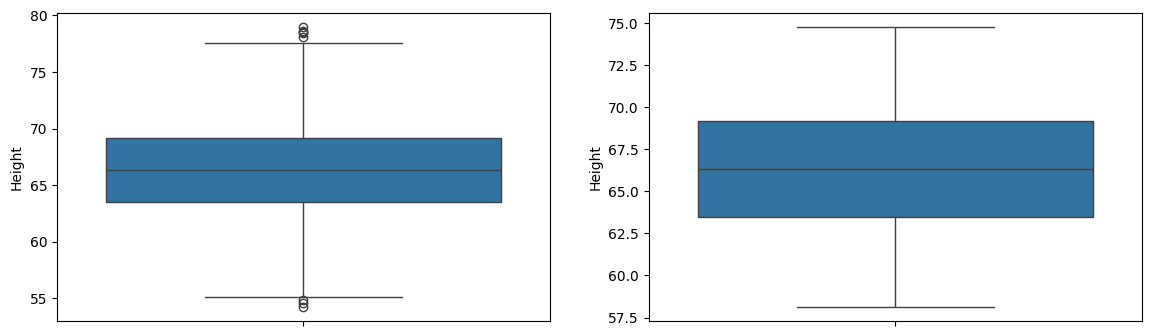

In [68]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(df['Height'])

plt.subplot(1,2,2)
sns.boxplot(df_cap['Height'])